In [4]:
import pandas as pd

# CARGA DE DATOS
#Para leer el archivo
df = pd.read_csv("./dataset.csv") # Por defecto detecta las columnas por el encabezado del archivo

# Puedo especificar algunos parametros adicionales como por ejemplo una columna como indice
# pd.read_csv("./dataset.csv", index_col = "id")

# Muestra la tabla completa
#df

# DESCUBRIENDO LOS DATOS
df.tail(5) # Muestra las últimas 5 filas de los datos
df.describe() # Muestra estadistica descriptiva 
df.head(5) # Muestra las primeras 5 filas de los datos

,id,full_text,favorites,retweets,mentions,country,user,followers,followees
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
4,183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [2]:
# LIMPIEZA DE DATOS (espacios vácios)

df_filtrado = df.dropna() #Devuelve df filtrado (quita NaN)
df_filtrado.head(5) # Muestra las primeras 5 filas de los datos

df_llenado = df.fillna(0) #Llena espacios NaN por 0
df = df.fillna({"retweets": 0, "mentions": -1}) # Llenar datos dependiendo de la fila
df_llenado.head()
df.head()

,id,full_text,favorites,retweets,mentions,country,user,followers,followees
0,183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258
1,183722,Today we commemorate and MNML Case.,500.0,21.0,-1.0,BRASIL,mateusmartins,982.0,1822
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
4,183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [11]:
# SELECCION Y FILTRADO

# Seleccionando columnas, a traves de su nombre
df["favorites"] # Me devuelve una sola columna como una Serie
df["full_text"] # Me devuelve una sola columna como una Serie
df[["favorites", "full_text"]] # Me devuelve un dataframe solamente con dos columnas

# Seleccionando filas, a traves de los indices (iloc -> por indice | loc -> por id)
df.loc[0] 
df.loc[0:2]
df.loc[[0, 1, 2]] 

# Seleccionando filas y columnas al mismo tiempo
df.loc[[0, 1, 2], ["favorites"]]
# Seleccionando todas las filas, y un grupo de columnas
df.loc[:, ["favorites", "full_text"]]
# Seleccionando un rango de filas y un grupo de columnas
df.loc[1:3, ["favorites", "full_text", "mentions"]]

# Seleccionando por condición
# Todas las filas que tengan un valor de favoritos mas altos de 100
df[df["favorites"] > 400] #Columna favoritos > 400
df[(df["favorites"] > 400) & (df["mentions"] > 20)]
df[df["full_text"].str.contains("Programming")] # Contenga la cadena ""

,id,full_text,favorites,retweets,mentions,country,user,followers,followees
12,183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
19,183740,Programming is a hot topic!,133.0,145.0,15.0,BRASIL,lucasperes,82.0,351
20,183741,Programming? i love it!,92.0,146.0,1.0,ECUADOR,galocastillo,332.0,378


In [4]:
# TRANSFORMACION DE DATOS
import random

# Agregando una columna de ganancias, calculada en base a los retweets
def calcularGanancias(retweets):
    return retweets * random.randint(3, 5)

#Nueva columna
df["ganancias"] = df["retweets"].apply(calcularGanancias) # Por cada valor de la columna se aplica
df.head(10)

# Agregando una columna de popularidad, calculada en base a mi numero de seguidores y numero de pesonas que sigo
def popularidad(fila):
    return fila["followees"]/fila["followers"]

df["popularidad"] = df.apply(popularidad, axis=1)
df.head(10)

,id,full_text,favorites,retweets,mentions,country,user,followers,followees,ganancias,popularidad
0,183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258,0.0,0.663239
1,183722,Today we commemorate and MNML Case.,500.0,21.0,-1.0,BRASIL,mateusmartins,982.0,1822,63.0,1.855397
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129,615.0,10.750000
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378,304.0,1.138554
4,183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129,390.0,10.750000
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822,350.0,1.855397
6,183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258,200.0,0.663239
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,MEXICO,pedrojuarez,12.0,129,200.0,10.750000
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129,246.0,10.750000
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,BRASIL,mateusmartins,982.0,1822,460.0,1.855397


In [24]:
# AGRUPANDO Y AGREGANDO DATOS
df.groupby("country").mean() # Agrupando por pais y sacando la media de cada columna

# Agrupando por pais y aplicando diferentes funciones de agregacion a cada columna
# Sum para la columna followers
df.groupby("country").agg({
    "followers": 'sum',
    "mentions": 'mean',
    "retweets": 'max'
})

grouped = df.groupby("country").agg({
    "followers": 'sum',
    "mentions": 'mean',
    "retweets": 'max'
})
grouped[grouped["followers"] > 5000]

C:\Users\ca_re\AppData\Local\Temp\ipykernel_16852\2079139672.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("country").mean() # Agrupando por pais y sacando la media de cada columna


,id,favorites,retweets,mentions,followers,followees
country,,,,,,
BRASIL,183736.090909,339.909091,91.272727,19.600,616.600,1889.363636
ECUADOR,183732.625000,186.375000,64.857143,11.875,360.500,318.000000
MEXICO,183732.500000,294.857143,77.750000,13.750,15.375,1101.000000


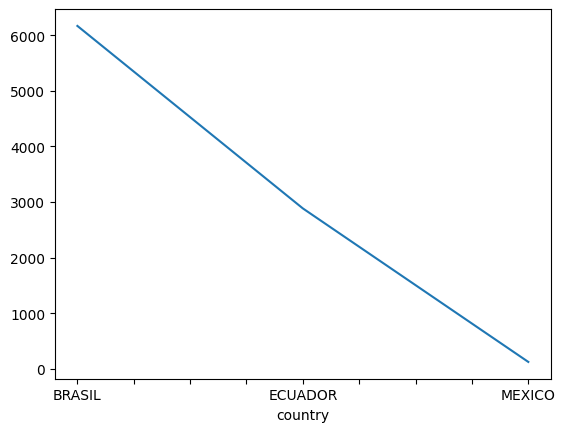

In [12]:
# GRAFICANDO DATOS
import matplotlib.pyplot as plt
grouped["followers"].plot() # Lineas
plt.show()

In [12]:
# Barras 
grouped[["followers"]].plot(kind="bar")
plt.show()

NameError: name 'grouped' is not defined

NameError: name 'plt' is not defined

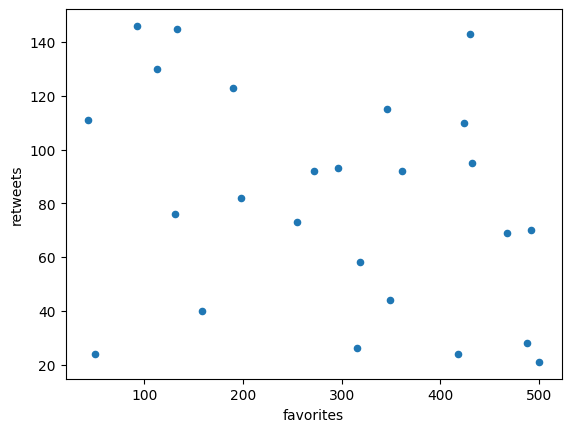

In [16]:
# Scatter plot (x vs y)
df.plot(kind="scatter", x ="favorites", y ="retweets")
plt.show()

In [14]:
# ALMACENAMIENTO
grouped.to_csv("./salida.csv")

NameError: name 'grouped' is not defined

In [9]:
# CREACION DESDE CERO
datos = [
    {
        "columna1": 1,
        "columna2": 93
    },
    {
        "columna1": 3,
        "columna2": 94
    }
]

df2 = pd.DataFrame(datos)
df2

,columna1,columna2
0,1,93
1,3,94
